In [30]:
from deepom.bionano_compare import *
from deepom.bionano_utils import *

report_a = BionanoCompareReport()
# report_a.run_name = "20221014T092718Z"
# report_a.run_name = "20221021T231508Z"
report_a.run_name = "20221022T000533Z"
report_a.read_compute_results()
report_a.plot_compare()

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


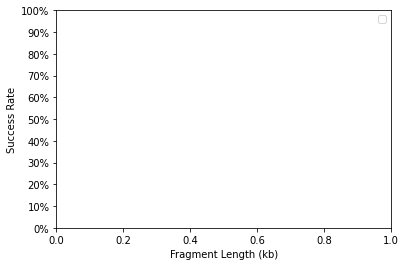

In [1]:
from deepom.bionano_compare import *

report_b = BionanoCompareReport()
# report_b.run_name = "20221011T134448Z"
report_b.run_name = "20221022T040554Z"
report_b.read_compute_results()


In [ ]:
self = report_b
self.aligner_accuracy_items = list(self.accuracy_items(self.aligner_items))
self.aligner_accuracy = self.plot_accuracy(self.aligner_accuracy_items, label="DeepOM")

if self.bionano_items is not None:
    accuracy_df = DataFrame(map(vars, self.accuracy_items(self.bionano_items))).query("RunId <= 8")
    self.bionano_accuracy = self.plot_accuracy(accuracy_df, label="Bionano Localizer + Aligner")
else:
    accuracy_df = DataFrame(map(vars, self.accuracy_items(self.aligner_bnx_items))).query("RunId <= 8")
    self.aligner_bnx_accuracy = self.plot_accuracy(accuracy_df, label="Bionano Localizer + DeepOM Aligner")
report_b.plot_compare()

In [37]:
report_b.bionano_accuracy_items[124].alignment_item.xmap_item.xmap_record

crop_item       <deepom.bionano_utils.BNXItemCrop object at 0x...
molecule_id                                                   145
XmapEntryID                                                  7323
QryContigID                                                   145
RefContigID                                                     7
QryStartPos                                                4517.0
QryEndPos                                                473630.0
RefStartPos                                            55578642.0
RefEndPos                                              56033588.0
Orientation                                                     +
Confidence                                                   8.54
HitEnum         2M1I1M1I1M3I1M3D1M2I2D1M4D2M2D1M1I1M3I1D1M1D4M...
QryLen                                                   503625.0
RefLen                                                159345973.0
LabelChannel                                                    1
Alignment 

In [40]:
df = DataFrame(
    [
        vars(_) | vars(_.alignment_item) | vars(_.alignment_item.crop_item) | {**_.alignment_item.crop_item.bnx_item.bnx_record} | {**_.alignment_item.xmap_item.xmap_record}
    for _ in report_b.bionano_accuracy_items
    ]
    )

correct
False    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
True     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

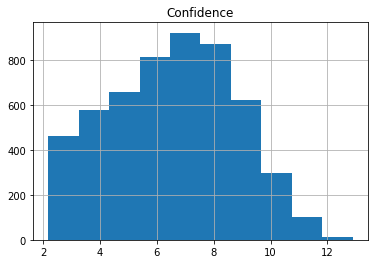

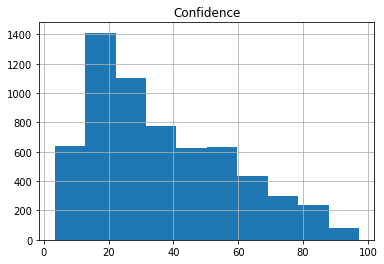

In [41]:

df.groupby("correct").hist("Confidence")

In [52]:
df.query("len_bp>200000").groupby("RunId")["correct"].mean()

RunId
1     1.000000
2     1.000000
3     1.000000
4     1.000000
7     1.000000
11    0.183374
Name: correct, dtype: float64

In [38]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

DataFrame(
    [
        vars(_) | vars(_.alignment_item) | vars(_.alignment_item.crop_item) | {**_.alignment_item.crop_item.bnx_item.bnx_record} | {**_.alignment_item.xmap_item.xmap_record}
    for _ in report_b.bionano_accuracy_items
    ]
    ).iloc[124:128].T

,124,125,126,127
len_bp,450000.0,450000.0,450000.0,450000.0
num_bnx_labels,69,76,69,74
parent_orientation,-,-,-,+
parent_ref_id,4,4,4,5
correct_seq,False,True,False,True
parent_ref_lims,"[52978583.0, 53412232.0]","[52978583.0, 53412232.0]","[52978583.0, 53412232.0]","[86038862.0, 86510982.0]"
overlap_fraction,NaN,1.0,NaN,0.999314
correct,False,True,False,True
alignment_item,<deepom.bionano_compare.AlignmentItem object a...,<deepom.bionano_compare.AlignmentItem object a...,<deepom.bionano_compare.AlignmentItem object a...,<deepom.bionano_compare.AlignmentItem object a...
accuracy_item,<deepom.bionano_compare.AccuracyItem object at...,<deepom.bionano_compare.AccuracyItem object at...,<deepom.bionano_compare.AccuracyItem object at...,<deepom.bionano_compare.AccuracyItem object at...


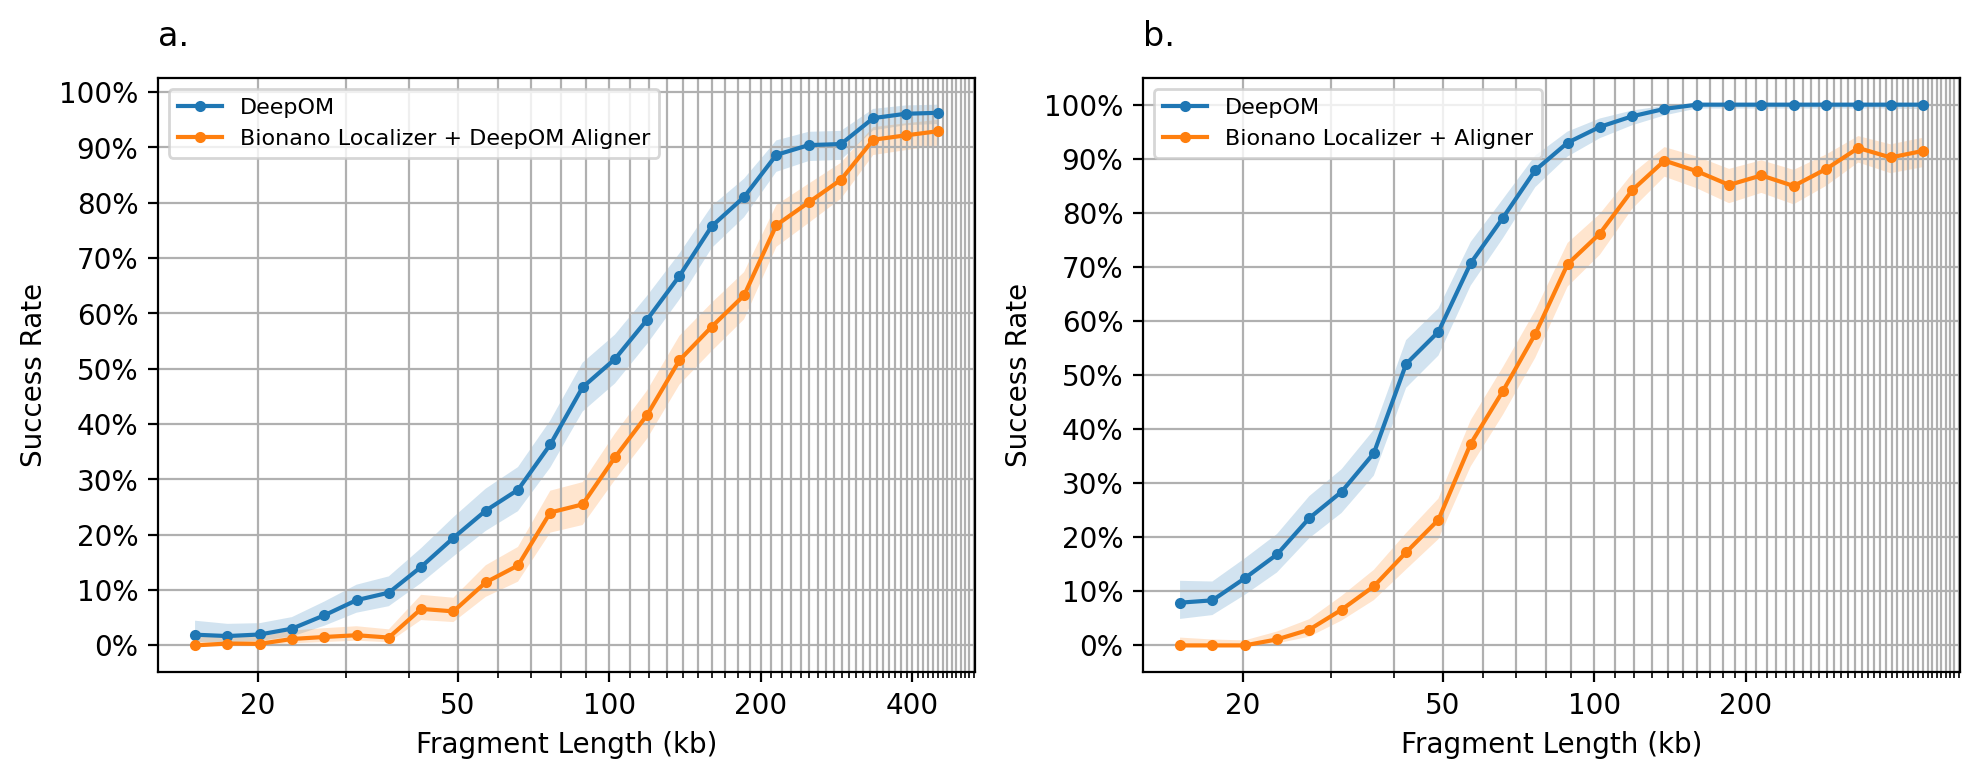

In [ ]:
from pathlib import Path
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator

_, axs = pyplot.subplots(figsize=(10, 4), dpi=200, ncols=2)

title_kw = dict(loc="left", y=1.1, pad=-10, fontdict={"color": "k"})
pyplot.sca(axs[0])
pyplot.title("a.", **title_kw)
report_a.plot_compare()


def set_fig_params():
    pyplot.xscale("log")
    ax = pyplot.gca()
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, y: int(x // 1000)))
    ax.xaxis.set_minor_locator(MultipleLocator(10000))
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    pyplot.grid(which="both")


set_fig_params()
pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano Localizer + DeepOM Aligner"],
    fontsize=8,
)
pyplot.xticks(numpy.stack([20, 50, 100, 200, 400]) * 1000)
pyplot.sca(axs[1])

pyplot.title("b.", **title_kw)
report_b.plot_compare()
set_fig_params()

pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano Localizer + Aligner"],
    fontsize=8,
)
pyplot.xticks(numpy.stack([20, 50, 100, 200]) * 1000)
pyplot.tight_layout()
for ext in [".pdf"]:
    pyplot.savefig(Path("../../DeepOM-Paper/figures") / ("benchmark_figure" + ext), bbox_inches='tight')